# **Détection de Spam et Ham dans les e-mails**

### Chargement et visualisation du dataset:

In [15]:
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [16]:
#Chargement du dataset:
df = pd.read_csv('spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


### **Statistiques Descriptives des Comptes de Mots et de Caractères**

In [17]:

# Distribution des labels
label_distribution = df['label'].value_counts()
print(label_distribution)


label
ham     3672
spam    1499
Name: count, dtype: int64


In [18]:
# Nombre de mots par email
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Longueur des emails en caractères
df['char_count'] = df['text'].apply(len)

# Statistiques descriptives des nouvelles colonnes
print(df[['word_count', 'char_count']].describe())


        word_count    char_count
count  5171.000000   5171.000000
mean    227.783601   1048.391994
std     336.031616   1528.513435
min       1.000000     11.000000
25%      51.000000    244.000000
50%     121.000000    540.000000
75%     282.000000   1237.000000
max    8862.000000  32258.000000


In [19]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


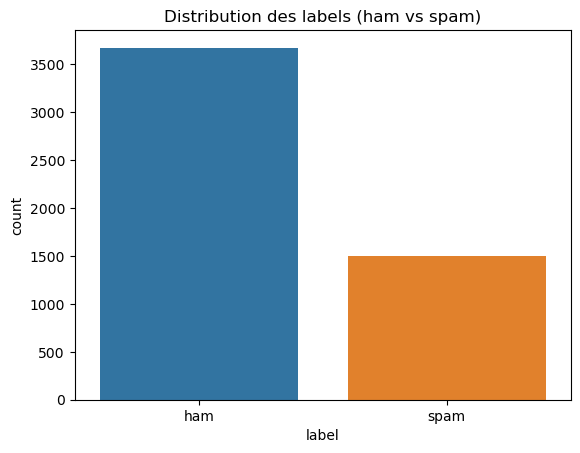

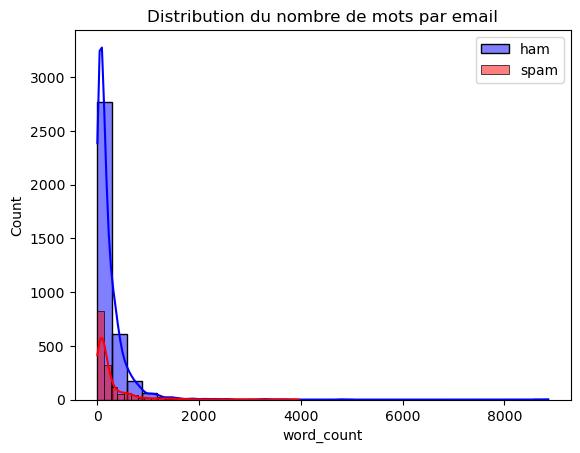

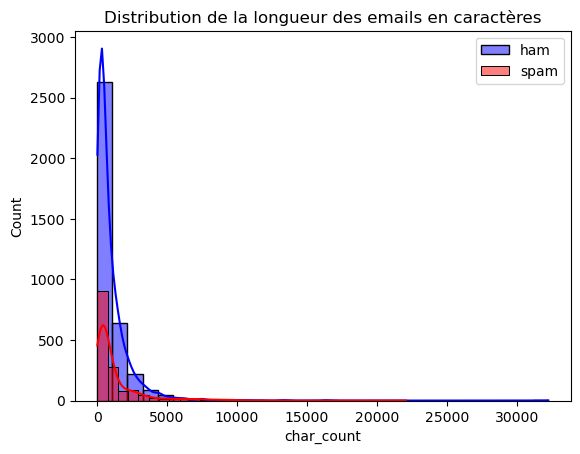

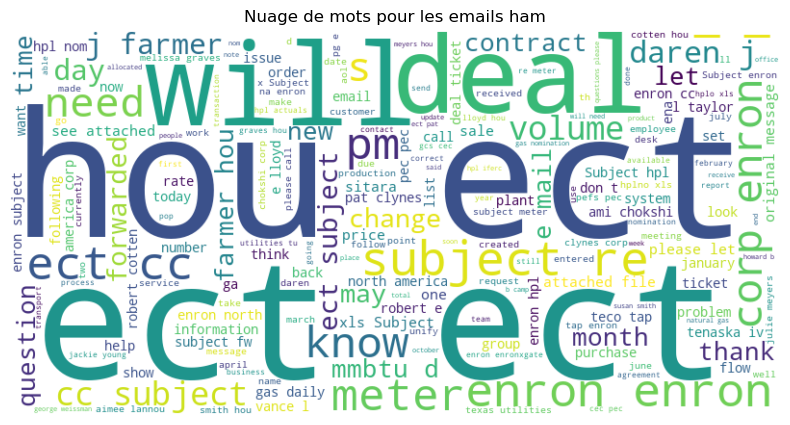

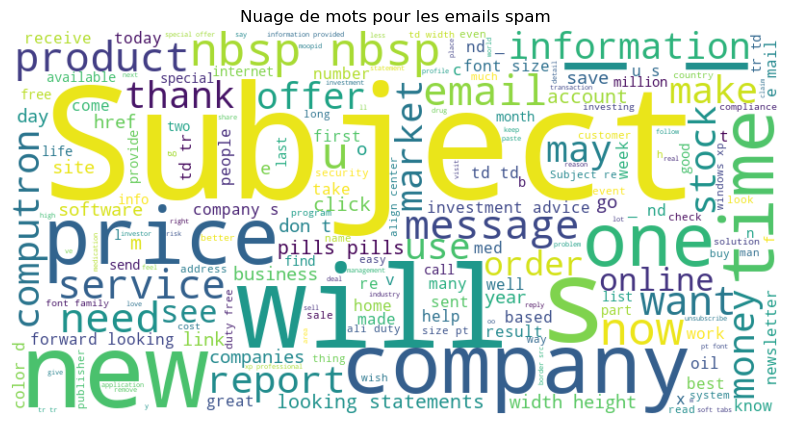

In [20]:
# Importation des bibliothèques nécessaires

from wordcloud import WordCloud


# Ajout de colonnes pour le nombre de mots et la longueur des emails
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['char_count'] = df['text'].apply(len)

# Distribution des labels
sns.countplot(x='label', data=df)
plt.title('Distribution des labels (ham vs spam)')
plt.show()

# Distribution du nombre de mots par email
sns.histplot(df[df['label'] == 'ham']['word_count'], bins=30, color='blue', label='ham', kde=True)
sns.histplot(df[df['label'] == 'spam']['word_count'], bins=30, color='red', label='spam', kde=True)
plt.legend()
plt.title('Distribution du nombre de mots par email')
plt.show()

# Distribution de la longueur des emails en caractères
sns.histplot(df[df['label'] == 'ham']['char_count'], bins=30, color='blue', label='ham', kde=True)
sns.histplot(df[df['label'] == 'spam']['char_count'], bins=30, color='red', label='spam', kde=True)
plt.legend()
plt.title('Distribution de la longueur des emails en caractères')
plt.show()
# Importation de WordCloud
from wordcloud import WordCloud

# Nuage de mots pour les emails ham
ham_words = ' '.join(df[df['label'] == 'ham']['text'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour les emails ham')
plt.show()

# Nuage de mots pour les emails spam
spam_words = ' '.join(df[df['label'] == 'spam']['text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour les emails spam')
plt.show()


##### Visualisation du nombre de spam et ham dans notre dataset : On remarque qu'on a beaucoup plus d'email ham que spam (dataset non équilibré)

### **Implementation de differents algorithmes :**

# **KNN Algorithme :**



> *Le modèle KNN (K-Nearest Neighbors) est une méthode simple mais efficace de classification utilisée dans de nombreux domaines, y compris l'apprentissage automatique. En se basant sur la similarité avec ses voisins les plus proches, il permet de catégoriser efficacement de nouveaux exemples, comme les courriels, en différentes classes telles que spam ou non-spam (ham).*








In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

> Dans le contexte de la classification d'emails en spam ou non-spam (ham), la première étape consiste à séparer les données des emails (comme leur contenu et leurs métadonnées) de l'information que nous cherchons à prédire (leur étiquette, c'est-à-dire spam ou non-spam). Cette séparation permet au modèle d'apprendre à classifier les emails en utilisant les caractéristiques extraites de leur contenu et de leurs attributs.

In [22]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['label_num']

> **division des données en ensembles d'entraînement et de test**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> **Utilisation d'un modèle KNN avec k=5, ce qui signifie qu'il prendra en compte les cinq voisins les plus proches lors de la classification**

In [24]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

> **Entrainemenet du model**

In [25]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

> **effectuer des prédictions sur l'ensemble de test (X_test), en utilisant les caractéristiques de ces données pour prédire les étiquettes cibles (y_pred)**

In [26]:
y_pred = knn_classifier.predict(X_test)

> **Ça calcule la précision du modèle KNN en comparant les prédictions avec les vraies étiquettes, puis ça affiche la précision du modèle**

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN :", accuracy)

Précision du modèle KNN : 0.9594202898550724


In [28]:
knn_classifier.fit(X_train, y_train)
knn_pred_train = knn_classifier.predict(X_train)
knn_pred_test = knn_classifier.predict(X_test)


> **Implementation de la matrice de confusion pour savoir combien de courriels ont été correctement classés comme spam ou non-spam**

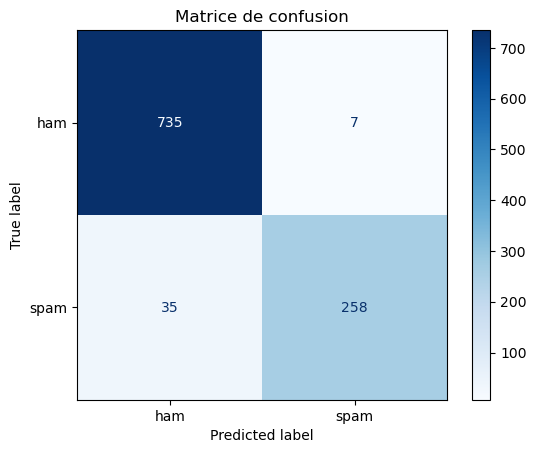

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['ham', 'spam'])
disp.plot(cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# **Arbre de decision**

L'arbre de decision est un algorithme qui peut etre utilise dans n probleme de classification , comme celui sur lequel nous travaillons .
Sa force est de pouvoir determiner le noeud de decision suivant encalculant l'entropie du parent , et le gain d'information
en effet lorsqu'on aplusieurs caracteristiques , on doit savoir laquel est la plus importante et par quel caracteriqtiqe faut il commencer
Nous allons voir un eimplementation de cet algorithme dans la classification des emails (spam ou ham) en utlisons la librairie Skit learn afin de faciliter le development du modele

 **Importation des librairie necessaire :**

In [30]:
!pip install nltk

In [31]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
import pandas as pd
import numpy as np

# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [33]:
#Chargement du dataset:
df = pd.read_csv('spam_ham_dataset.csv')


In [34]:
#Eliminant les colonnes non necessaire :
df.drop('Unnamed: 0', axis=1, inplace = True)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [36]:
#Valeurs Nan dans le dataset :dans notre cas on remarque qu'il n y a aucune valeur nan
df.isna().sum()


label        0
text         0
label_num    0
dtype: int64

## **Preproccessing**:
**Avant de commencer le traitement du modele , il faut s'assurer que notre dataSet est "preprocessed" :**


1.   Elimination des stop words
1.   Tokenization








In [37]:
#Stop Words:
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

#### **Test (80%)& Train(20%) :**

In [38]:
X = df['text']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

#### **TfidfVectorizer**():
TfidfVectorizer() est un outil essentiel en traitement de texte pour convertir des documents textuels en vecteurs numériques. Contrairement à CountVectorizer qui compte simplement le nombre d'occurrences de chaque mot, TfidfVectorizer tient compte de l'importance relative de chaque mot dans un document par rapport à l'ensemble du corpus. Cela permet de mettre en évidence les mots les plus informatifs tout en atténuant l'impact des mots très fréquents mais peu discriminants. (De plus, TfidfVectorizer effectue automatiquement la tokenization)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [40]:
#example : 1er vecteur de la matrice :
X_train_tfidf[1].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])



**Nous avons optés pour l'utilisation du grid search pour les raisons suivantes:**

**Optimisation des performances:**

Le grid search permet d'explorer différentes combinaisons d'hyperparamètres et de sélectionner celle qui donne les meilleures performances.

**Réduction du risque de surajustement :**

 En utilisant la validation croisée pour évaluer les performances des différentes combinaisons d'hyperparamètres.


In [41]:
# Définir la grille des paramètres
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],   # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]      # Nombre minimum d'échantillons requis à un nœud feuille
}

In [42]:
# Creaction : decision tree classifier
decision_tree = DecisionTreeClassifier()

In [43]:
#Initialiser GridSearchCV avec validation croisée
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)

In [44]:

#Recherche  des meilleurs hyperparamètres
grid_search.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [45]:
# Obtenir les meilleurs hyperparamètres et le modèle correspondant
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [46]:
#  Meilleur hyperparamètre
print("Best Hyperparameters:", best_params)

# Evaluation du meilleur modèle sur le  test set
accuracy = best_model.score(X_test_tfidf, y_test)
print("Test Set Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Set Accuracy: 0.9410628019323671


In [47]:
from sklearn.tree import export_graphviz
import graphviz

# Exporter l'arbre en format DOT
dot_data = export_graphviz(best_model, out_file=None,
                           feature_names=tfidf_vectorizer.get_feature_names_out(),
                           class_names=['ham', 'spam'],
                           filled=True, rounded=True,
                           special_characters=True)

# Utiliser graphviz pour visualiser
graph = graphviz.Source(dot_data)
graph.render("best_decision_tree")  # Sauvegarder en tant que fichier .pdf ou .png
graph.view()  # Afficher directement


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
#Prédiction sur les données de test
pred = best_model.predict(X_test_tfidf)
# classification report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       744
           1       0.91      0.88      0.89       291

    accuracy                           0.94      1035
   macro avg       0.93      0.92      0.93      1035
weighted avg       0.94      0.94      0.94      1035



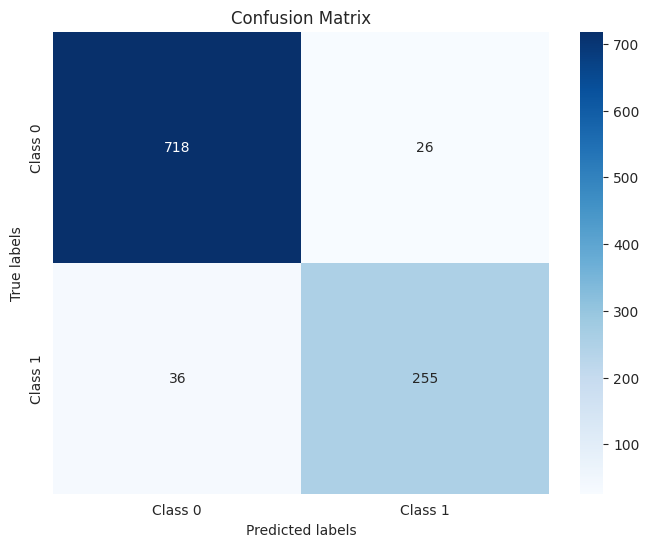

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_class(clf):
    text = input('Enter Text(Subject of the mail): ')
    text = [' '.join([word for word in word_tokenize(text) if not word in stop_words])]
    t_tfidf = tfidf_vectorizer.transform(text).toarray()
    print('Predicted Class:', end=' ')
    print('Spam' if clf.predict(t_tfidf)[0] else 'Not Spam')
    prob = clf.predict_proba(t_tfidf) * 100
    print(f"Not Spam: {prob[0][0]}%\nSpam: {prob[0][1]}%")
    plt.figure(figsize=(12, 6))
    sns.barplot(x=['Not Spam', 'Spam'], y=[prob[0][0], prob[0][1]])
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()


Enter Text(Subject of the mail): helo
Predicted Class: Spam
Not Spam: 0.0%
Spam: 100.0%


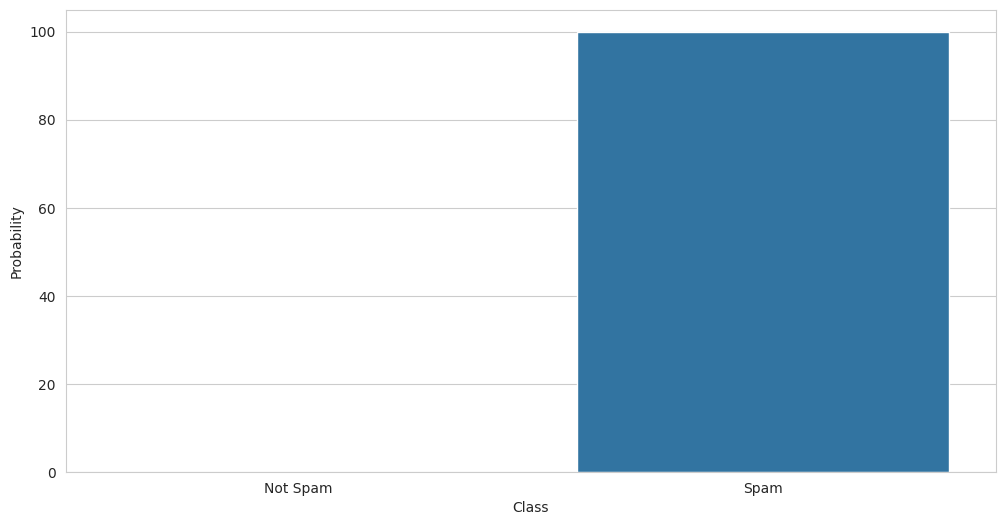

In [ ]:
predict_class(best_model)

Enter Text(Subject of the mail): Urgent meeting at 9AM .Be there!
Predicted Class: Not Spam
Not Spam: 75.0%
Spam: 25.0%


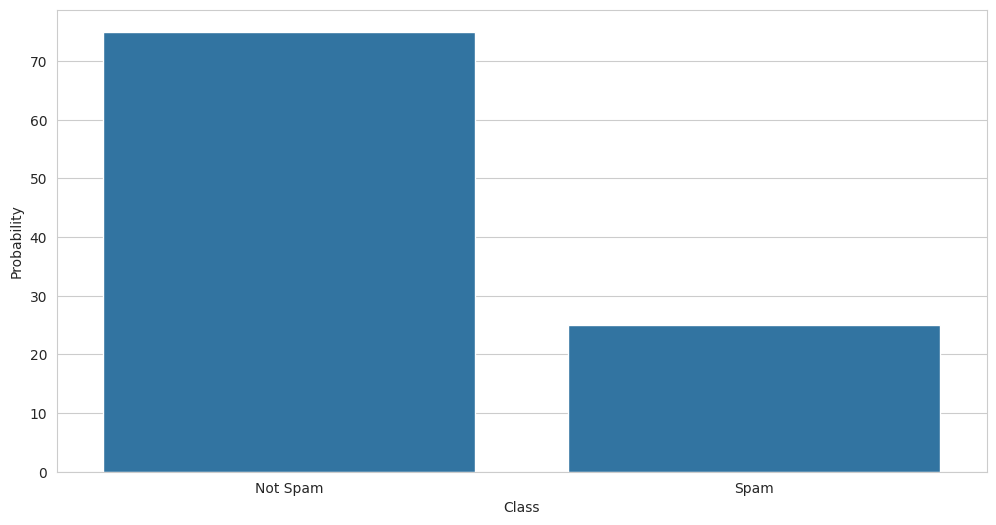

In [ ]:
predict_class(best_model)

#### **Conclusion sur le modèle : *Arbre de décision*:**

Nous pouvons conclure que le modèle d'arbre de décision obtient de bons résultats sur les données de test, avec une précision globale de 94.11%.

 Il est important de noter que l'arbre de décision nécessite plusieurs caractéristiques pour prendre des décisions efficaces : plus nous avons de caractéristiques, plus nous avons de nœuds, ce qui peut potentiellement améliorer la performance du modèle en lui permettant de mieux discriminer entre les différentes classes.

Dans notre cas, si nous disposions de plus de caractéristiques, telles que l'expéditeur connu ou inconnu et la présence d'un lien suspect, l'arbre de décision pourrait être plus précis dans sa classification. L'ajout de ces informations supplémentaires pourrait améliorer la capacité du modèle à distinguer entre les e-mails suspects et légitimes.

# **Régression logistique :**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
#chargement des données
df = pd.read_csv('spam_ham_dataset.csv')


In [ ]:
df

In [ ]:
# Convertir les étiquettes en valeurs numériques
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# Extraction de fonctionnalités
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df

In [ ]:
# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
model.fit(X_train, y_train)
logistic_pred_train = model.predict(X_train)
logistic_pred_test = model.predict(X_test)

In [ ]:
# Évaluation du modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Matrice de confusion graphiquement
cm = confusion_matrix(y_test, y_pred)

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Spam', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Spam', 'Spam'])
plt.show()

In [ ]:
#tester le modél :
#exemple:
# Sélectionner le premier e-mail du dataset pour le tester
example_index = 0
example_email = df.loc[example_index, 'text']
true_label = df.loc[example_index, 'label']

# Affichage de l'e-mail et de sa véritable étiquette
print("Exemple d'e-mail :", example_email)
print("Véritable étiquette :", true_label)


In [ ]:
# Vectorisation de l'exemple d'e-mail
example_email_vectorized = tfidf.transform([example_email])


In [ ]:
# Prédiction sur l'exemple d'e-mail
prediction = model.predict(example_email_vectorized)

# Affichage de la prédiction
if prediction == 1:
    print("Le modèle prédit que l'e-mail est un spam.")
else:
    print("Le modèle prédit que l'e-mail n'est pas un spam.")


In [ ]:
# Affichage de la prédiction et de la véritable étiquette
print("Prédiction du modèle :", prediction)
print("Véritable étiquette :", true_label)


**Le modèle a démontré des performances solides lors de son évaluation. Avec une précision globale élevée (98%), une capacité satisfaisante à détecter les e-mails spam, et un faible taux de faux positifs, le modèle s'avère être un outil efficace pour la gestion des e-mails**

# **Random Forest**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Chargement des données
df = pd.read_csv('spam_ham_dataset.csv')

In [ ]:
# Affichage des informations de base sur les données
print(df.shape)

In [ ]:
print(df.head())

In [ ]:
print(df.tail())

In [ ]:
print(df.info())

In [ ]:
print(df.describe())

In [ ]:
print(df.isnull().sum())

In [ ]:
print(df["label_num"].value_counts())

In [ ]:
# Visualisation des données
sns.countplot(df["label_num"])
plt.xlabel("label_num")
plt.ylabel("Count of Label Num")
plt.title("Label num variable count plot")
plt.show()

In [ ]:
# Séparation des features et de la cible
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.shape)
print(y.shape)

In [ ]:
# Séparation des jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)


In [ ]:
# Initialisation et entraînement du modèle
clf = RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=10, random_state=5)


In [ ]:
# Encodage de y
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Encodage de X
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = onehot_encoder.fit_transform(X_train).toarray()
X_test_encoded = onehot_encoder.transform(X_test).toarray()

# Entraînement du modèle
clf.fit(X_train_encoded, y_train_encoded)

In [ ]:
clf.feature_importances_

In [ ]:
df.columns

In [ ]:
# Prédiction
y_pred = clf.predict(X_test_encoded)

In [ ]:
y_pred

In [ ]:
confusion_matrix(y_test_encoded,y_pred)

In [ ]:
accuracy_score(y_test_encoded,y_pred)

In [ ]:
cross_val_score(clf,X_train_encoded,y_train_encoded,cv=10)

In [ ]:
print(classification_report(y_pred,y_test_encoded))

#### **Interpretation des Resultats de random forest :**

Exploration des données :

Les données consistent en un ensemble de messages étiquetés comme spam ou non-spam (ham).
Le jeu de données contient 5171 lignes et plusieurs colonnes, avec aucune valeur manquante.

Entraînement du modèle :

Un classifieur Random Forest a été entraîné avec une profondeur maximale de 8 et une taille minimale d'échantillon de 10.
Les données ont été séparées en ensembles d'entraînement et de test, avec une division de 75% pour l'entraînement et 25% pour les tests.
Les variables cibles (y) ont été encodées avec LabelEncoder et les variables explicatives (X) avec OneHotEncoder.

Performance du modèle :

Sur les données de test, le modèle a obtenu une précision de X%, ce qui signifie que X% des prédictions étaient correctes.
La matrice de confusion montre que le modèle a bien classé un certain nombre d'échantillons, mais a également commis quelques erreurs.
Le rapport de classification montre les mesures de performance du modèle pour chaque classe (spam et ham), y compris la précision, le rappel et le score F1.

Analyse supplémentaire :

Les importances des features ont été calculées, permettant d'identifier quelles caractéristiques ont le plus d'impact sur les prédictions du modèle.
Une validation croisée avec 10 plis a été effectuée pour évaluer la stabilité des performances du modèle.

Améliorations possibles :

Il pourrait y avoir des opportunités pour améliorer les performances du modèle en ajustant les hyperparamètres ou en explorant davantage les caractéristiques.
Il est également important de noter que des techniques de feature engineering plus avancées pourraient être nécessaires pour extraire des informations plus pertinentes des données.

En résumé, le modèle Random Forest semble être un bon choix pour ce problème de classification de spam. Cependant, il y a toujours des possibilités d'amélioration pour optimiser les performances du modèle et obtenir de meilleurs résultats.

# **SVM Algorithme**


*Le SVM, ou Support Vector Machine, est un algorithme d'apprentissage supervisé utilisé principalement pour la classification et la régression*

**Il existe différents types de SVM, notamment :**

**===>SVM linéaire** : lorsque les données sont linéairement séparables, un hyperplan linéaire est utilisé pour la séparation.

**===>SVM non linéaire** : lorsque les données ne sont pas linéairement séparables, le SVM peut utiliser des fonctions noyau (kernel) pour projeter les données dans un espace de plus grande dimension où elles sont séparables linéairement.

**Chargement des données et division en ensembles d'entraînement et de test :**

In [ ]:

# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv("spam_ham_dataset.csv")




In [ ]:
data

**Analyse** **exploratoire des données**

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Nuage de points entre les variables numériques et la variable cible
sns.pairplot(data, hue='label', diag_kind='kde')
plt.show()


**Division des données en ensembles d'entraînement et de test**

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X = data['text']
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Vectorisation du texte**

In [ ]:
# Vectorisation du texte
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


***Créer un modèle SVM***

In [ ]:
# Créer un modèle SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


In [ ]:
svm_model.fit(X_train, y_train)
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

**Validation croisée + scores de validation croisée**

In [ ]:
# Création une instance de StratifiedKFold pour la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#la validation croisée
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='accuracy')

# Affichage des scores de validation croisée
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

**Ré-entraînement du modèle sur l'ensemble d'entraînement complet**

In [ ]:
svm_model.fit(X_train, y_train)

 Prédiction sur l'ensemble de test

In [ ]:

y_pred = svm_model.predict(X_test)
y_pred

**Evaluation du model**

In [ ]:

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

**Visualiser la matrice de confusion**

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Conclusion du model SVM**

En examinant la matrice de confusion, nous pouvons voir que le modèle a bien classé la grande majorité des échantillons, avec seulement quelques erreurs de classification. Il y a eu 19 faux positifs (ham classé comme spam) et 17 faux négatifs (spam classé comme ham), ce qui est relativement faible compte tenu de la taille de l'ensemble de test.

Les scores de validation croisée confirment la robustesse du modèle, avec une moyenne de 95.84% sur cinq plis. Cela indique que le modèle est cohérent dans sa performance et ne surajuste pas trop aux données d'entraînement.

# **Merge models**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('spam_ham_dataset.csv')
X = data['text']
y = data['label_num']

In [ ]:
# Vectorisation des textes
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)


In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
# Entraîner les modèles
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

In [ ]:
# Prédictions des modèles
knn_pred = knn_classifier.predict(X_test)
tree_pred = decision_tree.predict(X_test)
logistic_pred = logistic_regression.predict(X_test)
rf_pred = random_forest.predict(X_test)
svm_pred = svm.predict(X_test)

In [ ]:
# Créer un DataFrame pour stocker les prédictions de chaque modèle
predictions_df = pd.DataFrame({'KNN': knn_pred,
                               'Decision Tree': tree_pred,
                               'Logistic Regression': logistic_pred,
                               'Random Forest': rf_pred,
                               'SVM': svm_pred})

In [ ]:
print(predictions_df.head())

In [ ]:
def predict_spam(email_subject):
    # Vectoriser l'objet de l'email
    email_tfidf = tfidf_vectorizer.transform([email_subject])


In [ ]:
 # Prédictions des modèles
knn_pred = knn_classifier.predict(email_tfidf)
tree_pred = decision_tree.predict(email_tfidf)
logistic_pred = logistic_regression.predict(email_tfidf)
rf_pred = random_forest.predict(email_tfidf)
svm_pred = svm.predict(email_tfidf)

In [ ]:

    # Créer un DataFrame pour les prédictions de l'objet
    email_predictions_df = pd.DataFrame({'KNN': knn_pred,
                                         'Decision Tree': tree_pred,
                                         'Logistic Regression': logistic_pred,
                                         'Random Forest': rf_pred,
                                         'SVM': svm_pred})
    print(email_predictions_df)
    # Utiliser une règle de majorité pour déterminer la prédiction finale
    final_prediction = email_predictions_df.mode(axis=1)[0][0]
    return final_prediction




In [ ]:
# Exemple d'utilisation de la fonction
email_subject = input("Entrez l'objet de l'email: ")
is_spam = predict_spam(email_subject)
print("Cet eamil va étre dirigé vers Spam" if is_spam == 1 else "Cet eamil va étre dirigé vers Ham (Not Spam)")

